# `1.0 Temperature Sensor 🌡`

## <span style="color:tomato"> Overview </span>

The TMP117 is a digital temperature sensor, providing a 16-bit temperature result with a best case accuracy of up to $\pm 0.1 ^{\circ}C$, a worst case accuracy of up to $\pm 0.3 ^{\circ}C$, and a resolution of $\pm 0.0078 ^{\circ}C$. The TMP117 effectively measures the temperature of its surroundings, namely the LunaSat. In order to measure the temperature of an object further away, the TPIS 1385 thermopile sensor is more appropriate.

---

## <span style="color:tomato"> Configurations </span>
#### The sensor has several primary configurable modes:  
- <span style="color:orange"> **Continuous Conversion Mode**</span>: The sensor continuously performs temperature conversions and updates a result register after each conversion. Following the conversion, the sensor enters a standby period. During active conversion, the sensor consumes about 135μA and only 1.25μA in standby. The lengths of the active and standby periods are configurable.

- <span style="color:orange"> **Shutdown Mode (SM)**</span>: When entering shutdown mode, the sensor aborts any ongoing conversions and enters a low-power shutdown mode. In shutdown mode, the sensor still continues to consume power. The device typically only consumes 250nA in shutdown mode.  

- <span style="color:orange"> **One-Shot Mode (OS)**</span>: The sensor conducts a "single" temperature conversion and then goes into shutdown mode. There is no standby period in this mode. Therefore the only configurable setting is the number of conversions to be sampled and averaged before being passed to the data register. This mode is most appropriate for the GLEE lunar mission because it balances power consumption with meeting temporal sampling requirements.

- <span style="color:orange">**Therm and Alert Modes**</span>: The therm and alert modes compare results after every conversion against a high and a low value, and will set respective alert flags if the temperature passes either. While only either the Therm mode or the Alert mode can be active, the temperature sensor can be in one or the other in addition to the One-Shot Mode and Continuous Conversion Mode. Due to the nature of the flight code, we will not be including these in the configurations. Samples will be collected regardless of if they exceed the threshold, but these samples can be filtered with post-processing once they are transmitted from the Moon to Earth.


The temperature sensor accumulates conversions and reports the average at the end of each conversion cycle. The possible averaging options are 0, 8, 32, or 64 conversions per conversion cycle. 
* The default TMP117 setting from startup is 8 averages and a conversion cycle of 1s. By default, the Alert mode will be active. 

---

## <span style="color:tomato"> Creating Configurations </span>

We'll generate a model of the sensor's power and data usage with these configurations, and ultimately generate a power and data usage model for the entire LunaSat. These configurations will be passed into the flight code of the LunaSats in order to appropriately setup sensors for the mission.

From the following options, create several configurations by choosing the mode, the number of conversions to average, and the  conversion cycle time (in seconds). 

- <span style="color:orange">**Modes**</span>: {"CONTINUOUS_CONVERSION", "ONE_SHOT", "SHUTDOWN"}
- <span style="color:orange">**No. of Averaged Conversions (No. of samples to average together)**</span>: {0, 8, 32, 64}  
- <span style="color:orange">**Conversion Cycles (s)**</span>: {0.0155, 0.125, 0.25, 0.5, 1, 4, 8, 16}
    - Conversion cycles are used for the CONTINUOUS_CONVERSION mode only
    - Note that not all conversion cycle options are valid for a particular averaging option. Refer to the following lists to determine what options are available for the different averaging options.
         - 0 (No Averaging) : {0.0155, 0.125, 0.25, 0.5, 1, 4, 8, 16}
         - 8 Averaged Conversions: {0.125, 0.25, 0.5, 1, 4, 8, 16}
         - 32 Averaged Conversions : {0.5, 1, 4, 8, 16}
         - 64 Averaged Conversions : {1, 4, 8, 16}

Certain configurations do not utilize all available settings. Below are the configuration formats for the 3 possible modes you can choose from. Anything with {} braces indicates a parameter you can change.

 - <span style="color:orange">("SHUTDOWN", 0, 0)</span>
 - <span style="color:orange">("ONE_SHOT", { No. of Averaged Conversions }, 0.0155)</span>
 - <span style="color:orange">("CONTINUOUS_CONVERSION", { No. of Averaged Conversions }, { Conversion Cycles })</span>
 
You should also choose how long the sensor will spend in that configuration (duration, in seconds) and how fast the TMP117 sensor should retrieve samples (in seconds between samples).
- <span style="color:orange">**Configuration duration (s)**</span>: {n} 
- <span style="color:orange">**Sampling rate (s)**</span>: {n}
    - The time it takes for the TMP117 sensor to retrieve a sample is 0.0155 seconds. Thus the sampling rate can be no smaller than 0.0155.
    
<span style="color:#18BF7D">For the following code, replace 'None' with appropriate values based on what you have learned above. Any lines without a 'None' should not be modified. Changing the values of the variables allows you to adjust a configuration consisting of a collection of these variables. At the end of the code, these configurations, in addition to their durations and the sampling rates, are put together in a list.</span>

In [3]:
import micropip
await micropip.install("matplotlib")
import matplotlib.pyplot as plt
await micropip.install("numpy")
import numpy as np
import sys

sys.path.append('content\modelFolder\source')
from source.TMP117 import TMP117 # Import the temperature sensor class

# Example parameters

mode = "CONTINUOUS_CONVERSION"
num_averages = 8
conv_cycle_time = 1

example_configuration = (mode, num_averages, conv_cycle_time) # Parentheses are used to group variables together in a 'tuple', a data type in Python 
duration = 10
sampling_rate = 0.01


# Try creating 3 distinct configurations below by replacing None with appropriate values

# Configuration 1

mode = "CONTINUOUS_CONVERSION"
num_averages = 8
conv_cycle_time = 1

configuration_1 = (mode, num_averages, conv_cycle_time)
duration_1 = 10
sampling_rate_1 = 0.01

# Configuration 2

mode = "ONE_SHOT"
num_averages = 0
conv_cycle_time = 0.0155

configuration_2 = (mode, num_averages, conv_cycle_time)
duration_2 = 10
sampling_rate_2 = 1

# Configuration 3

mode = "SHUTDOWN"
num_averages = 0
conv_cycle_time = 0

configuration_3 = (mode, num_averages, conv_cycle_time)
duration_3 = 10
sampling_rate_3 = 1

# Below, we group together the configuration tuple with a duration and sampling rate in another tuple
# These tuples are added to a list called modes_TMP
modes_TMP = [(configuration_1,duration_1,sampling_rate_1), (configuration_2,duration_2,sampling_rate_2), (configuration_3,duration_3,sampling_rate_3)]
print(modes_TMP)

[(('CONTINUOUS_CONVERSION', 8, 1), 10, 0.01), (('ONE_SHOT', 0, 0.0155), 10, 1), (('SHUTDOWN', 0, 0), 10, 1)]


## <span style="color:tomato"> Configurations for a Lunar Mission </span>

Now that you have explored different configurations, let's consider choosing the ideal mode for a lunar mission. The Continuous Conversion mode is not appropriate for the mission because we only need to retrieve data samples according to the temporal requirements of a particular science use case. In other words, using Continuous Conversion wastes power. So we should only consider using the One-Shot (OS) mode or the Shutdown mode.

<span style="color:#18BF7D">With these limitations in mind, revisit the configurations you set above and revise them so that they are well-suited for a lunar mission. </span>

## <span style="color:tomato"> Calculating Power Usage </span>

We can calculate the power usage for any configuration to get an idea of how it's affected by the various settings. Power is measured in milliWatts, where 1 milliWatt is equivalent to 0.001 Joules of energy per second. It's important to recognize that the outputted powers are averages. For example, if you are using the ONE_SHOT mode and you select a sampling rate where the time between samples is greater than 1 second, then the power used by the TMP117 sensor will be greater during the second it retrieves the sample compared to any other time.

<span style="color:#18BF7D">Do not modify the following code. Simply run the cell to see the output.</span>

Config. 1:  58.8555 milliWatts
Config. 2:  7.3925775 milliWatts
Config. 3:  0.49499999999999994 milliWatts


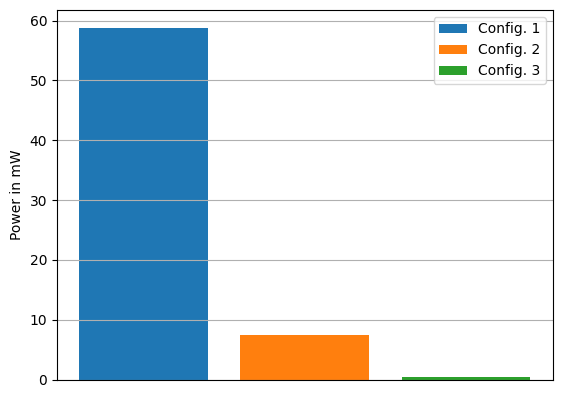

In [4]:
power_1 = TMP117.compute_power(TMP117,*configuration_1,sampling_rate_1)
power_2 = TMP117.compute_power(TMP117,*configuration_2,sampling_rate_2)
power_3 = TMP117.compute_power(TMP117,*configuration_3,sampling_rate_3)

print("Config. 1: ", power_1, "milliWatts")
print("Config. 2: ", power_2, "milliWatts")
print("Config. 3: ", power_3, "milliWatts")

plt.bar(1, power_1, label='Config. 1')
plt.bar(2, power_2, label='Config. 2')
plt.bar(3, power_3, label='Config. 3')
plt.xticks([])
plt.ylabel('Power in mW')
plt.grid()
plt.legend()
plt.show()

## <span style="color:tomato"> Calculating Data Usage </span>

We can calculate the data usage for any configuration to get an idea of how it's affected by the various settings. It's important to note that we are concerned with the data usage based on the sampling rate, not the number of samples being averaged behind the scenes. The size of a particular data sample is dependent on the sensor and the size of a timestamp appended to the sample. For the TMP117 sensor, the raw data consists of 2 bytes, which combined with a 4 byte timestamp gives 6 bytes per data sample.

<span style="color:#18BF7D">Do not modify the following code. Simply run the cell to see the output.</span>

Config. 1:  600.0 bytes per second
Config. 2:  6.0 bytes per second
Config. 3:  0 bytes per second


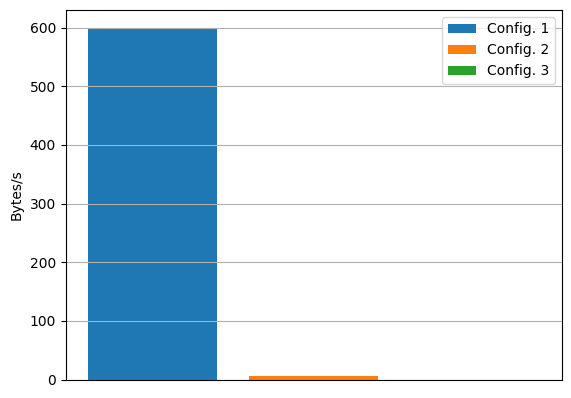

In [5]:
data_1 = TMP117.compute_data(TMP117,*configuration_1,sampling_rate_1)
data_2 = TMP117.compute_data(TMP117,*configuration_2,sampling_rate_2)
data_3 = TMP117.compute_data(TMP117,*configuration_3,sampling_rate_3)

print("Config. 1: ", data_1, "bytes per second")
print("Config. 2: ", data_2, "bytes per second")
print("Config. 3: ", data_3, "bytes per second")

plt.bar(1, data_1, label='Config. 1')
plt.bar(2, data_2, label='Config. 2')
plt.bar(3, data_3, label='Config. 3')
plt.xticks([])
plt.ylabel('Bytes/s')
plt.grid()
plt.legend()
plt.show()

## <span style="color:tomato"> Putting It All Together </span>

Finally, we'll take a look at the power and data usage of all of our configurations together. The time_step is the distance between data values in the plot, and the total duration is how long the sensor is active for in the model.

<span style="color:#18BF7D">Do not modify the following code. Simply run the cell to see the output.</span>

In [ ]:
time_step = 1
total_duration = duration_1 + duration_2 + duration_3

tmp = TMP117(time_step, total_duration, modes_TMP, loop_rate = 20)
tmp_power, tmp_data, tmp_time = tmp.run_sim()

We'll store our generated data for use in the combined power and data model.

In [ ]:
%store tmp_power
%store tmp_data
%store tmp_time

[Click here to continue to the next sensor, the magnetometer.](1.1%20Magnetometer.ipynb)

If you would like to look at more detailed information for the TMP117 sensor, consider looking at the [TMP117 Datasheet](https://www.ti.com/lit/ds/symlink/tmp117.pdf?ts=1658692589141).